# 1. Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data_train=pd.read_csv("train.csv")
raw_data_test=pd.read_csv("test.csv")

In [3]:
sp_train=raw_data_train.copy(deep=True)
sp_test=raw_data_test.copy(deep=True)

In [4]:
sp_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
sp_train.shape

(8693, 14)

In [6]:
sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
sp_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# 2. EDA(Exploratory Data Analysis)

In [8]:
missing_values=['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']

In [9]:
for i in missing_values:
    print(f'Percentage of missing {i} records is %.2f%%' %((sp_train[i].isna().sum()/sp_train.shape[0])*100))
    print(f'unique values of {i}:' ,sp_train[i].unique())
    print(f'Value Counts of {i}:\n',sp_train[i].value_counts())
    print(f'\n')

Percentage of missing HomePlanet records is 2.31%
unique values of HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Value Counts of HomePlanet:
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


Percentage of missing CryoSleep records is 2.50%
unique values of CryoSleep: [False True nan]
Value Counts of CryoSleep:
 False    5439
True     3037
Name: CryoSleep, dtype: int64


Percentage of missing Cabin records is 2.29%
unique values of Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Value Counts of Cabin:
 G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


Percentage of missing Destination records is 2.09%
unique values of Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Value Counts of Destination:
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype

percentage of true value : 50.36%
percentage of false value  : 49.64%


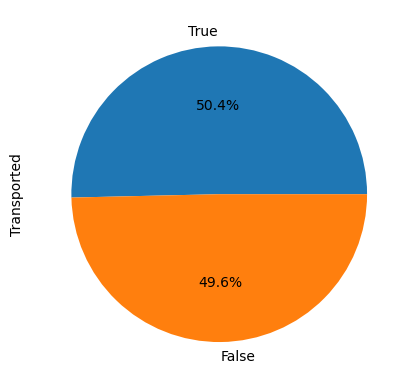

In [10]:
percentage_true=sp_train['Transported'].value_counts(normalize=True)[True]*100
percentage_false=sp_train['Transported'].value_counts(normalize=True)[False]*100

print('percentage of true value : %.2f%%' %percentage_true)
print('percentage of false value  : %.2f%%' %percentage_false)
sp_train['Transported'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show();

In [11]:
col=['HomePlanet','CryoSleep','Destination','VIP']

Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: HomePlanet, dtype: float64


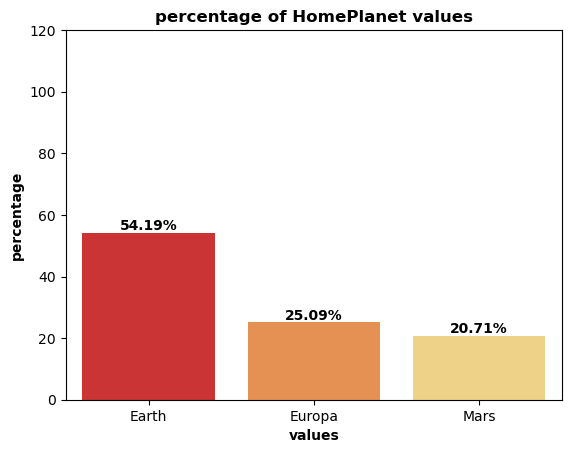

False    64.16942
True     35.83058
Name: CryoSleep, dtype: float64


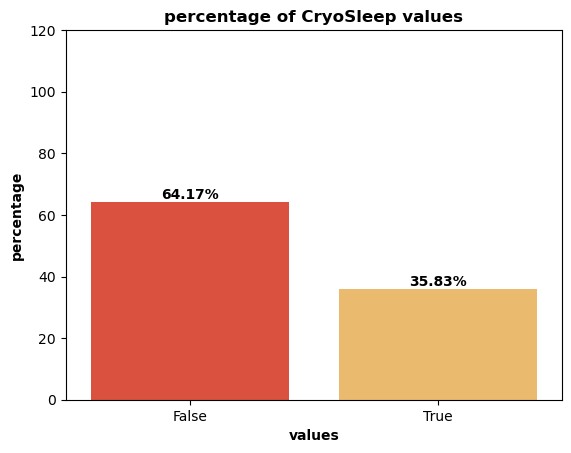

TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: Destination, dtype: float64


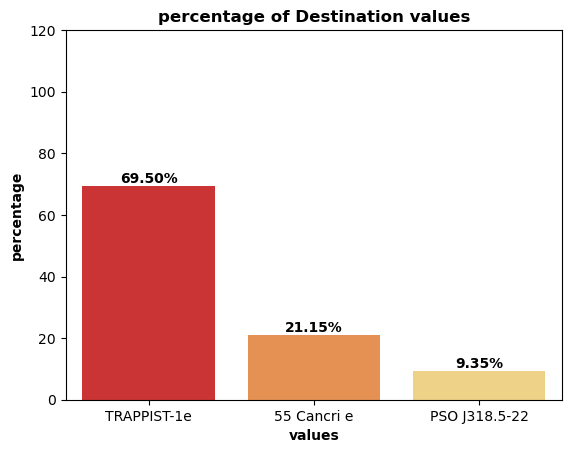

False    97.656066
True      2.343934
Name: VIP, dtype: float64


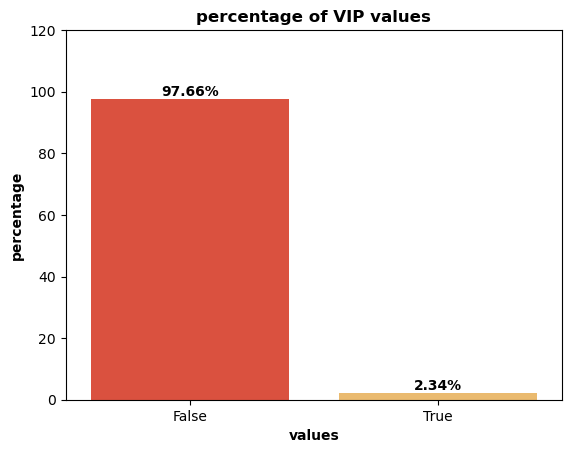

In [12]:
for i in col:
    percentage=(sp_train[i].value_counts(normalize=True)*100)
    ax=sns.barplot(x=percentage.index,y=percentage.values,palette='YlOrRd_r')

    for index, value in enumerate(percentage.index):
        ax.text(index,percentage[index]+1, f"{percentage[index]:.2f}%",color='black',ha='center',fontweight='bold')
        plt.title(f'percentage of {i} values', fontweight='bold')
        plt.xlabel('values',fontweight='bold')
        plt.ylabel('percentage',fontweight='bold')
        plt.ylim(0,120)    
    
    print(percentage)
    plt.show();
        

### Insight
- Most of passengers departed from Earth with the majority percentage of 54.03%
- About 34.94% which is around 35% of Passengers were on CryoSleep during the travel.
- Most of passengers were travelling to TRAPPIST-1e, with almost 70.14% which is around 70%.
- Only about 2.29% which is around 2% of the passengers paid for VIP services.

In [13]:
col1=['Transported','HomePlanet','Destination']

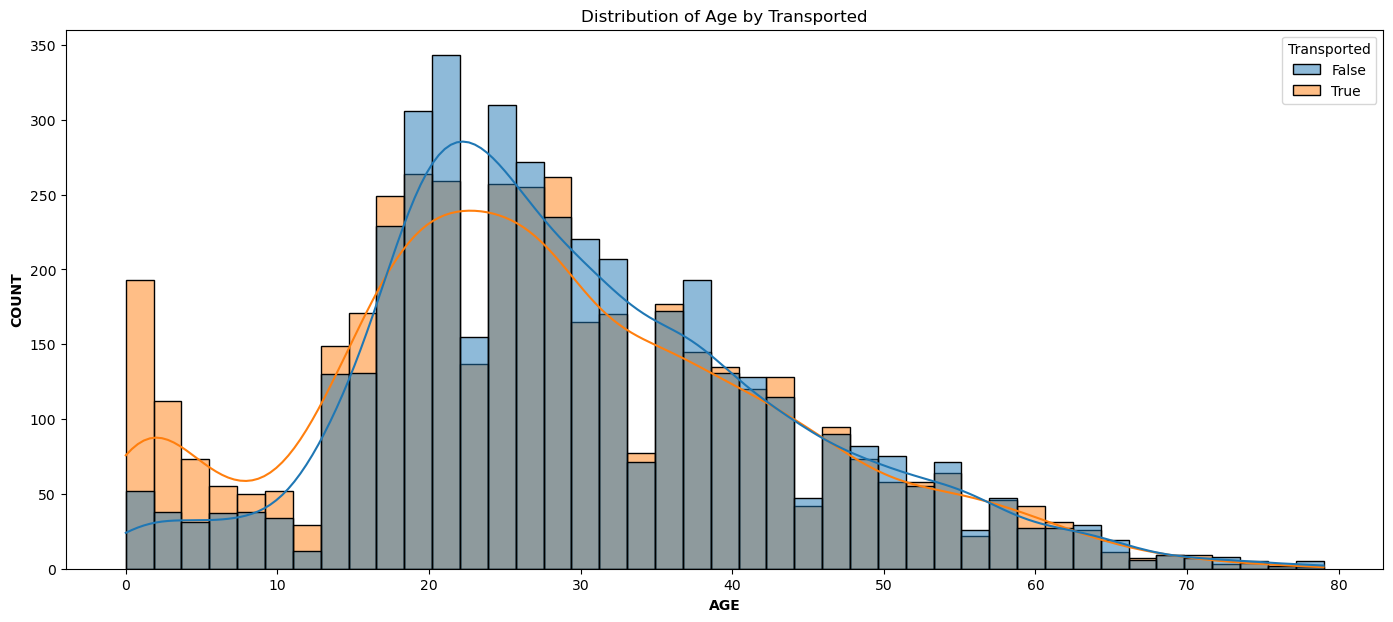

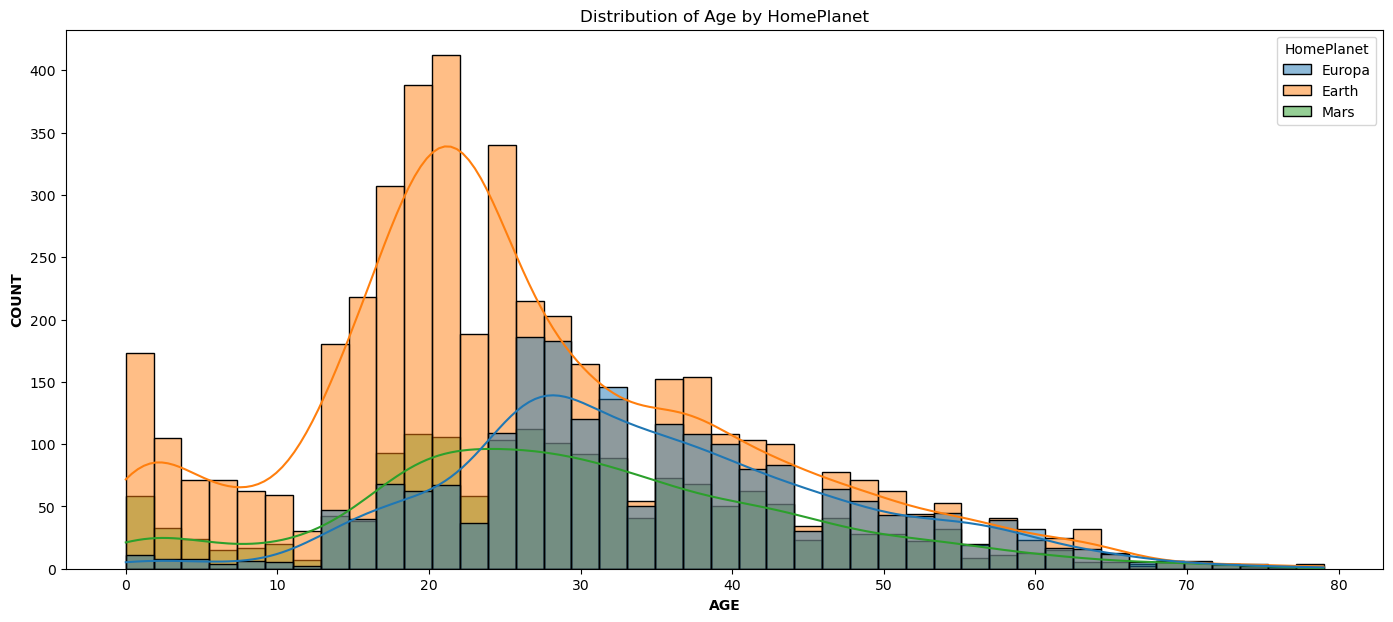

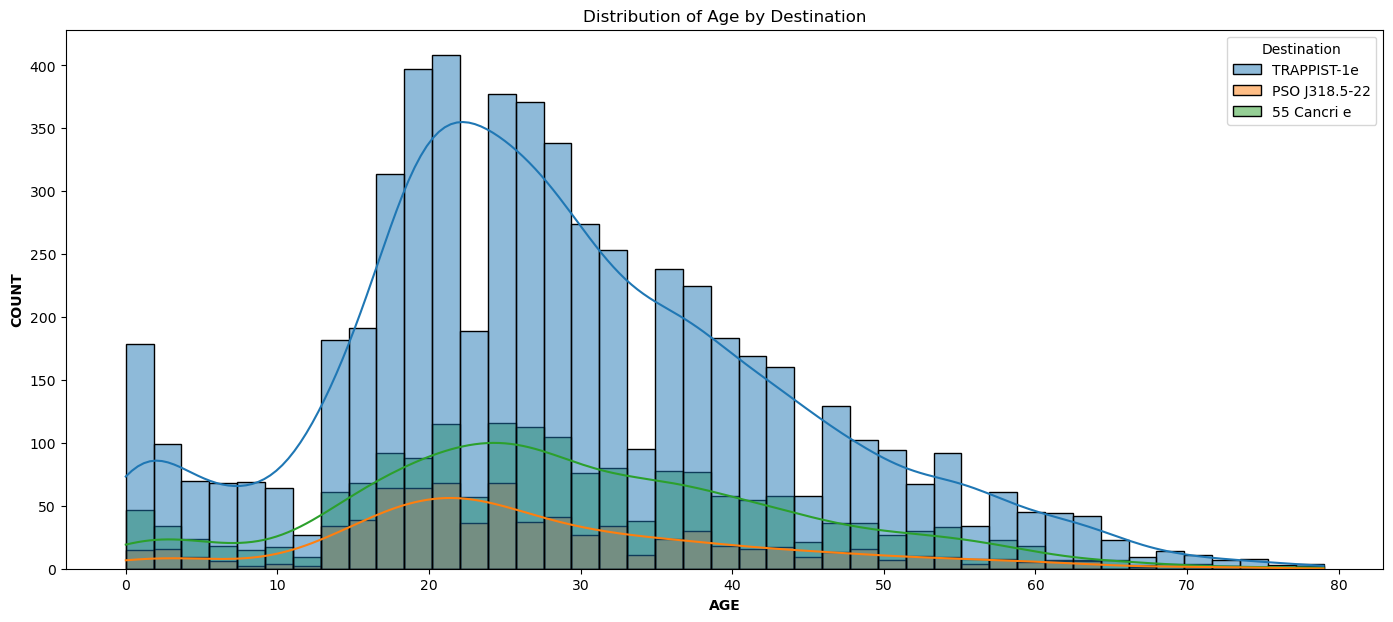

In [14]:
for i in col1:
    plt.figure(figsize=(17,7))
    sns.histplot(x=sp_train['Age'],hue=sp_train[i],kde=True,multiple='layer')
    plt.title(f'Distribution of Age by {i}')
    plt.xlabel('AGE',fontweight='bold')
    plt.ylabel('COUNT',fontweight='bold')
    plt.show()

### Insight:
- most passengers are around 20 to 40 years old.
- From Earth most are of age- 22, From mars- 25, From Europa- 27
- Destination Most have age 21-25

In [15]:
col2=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',]

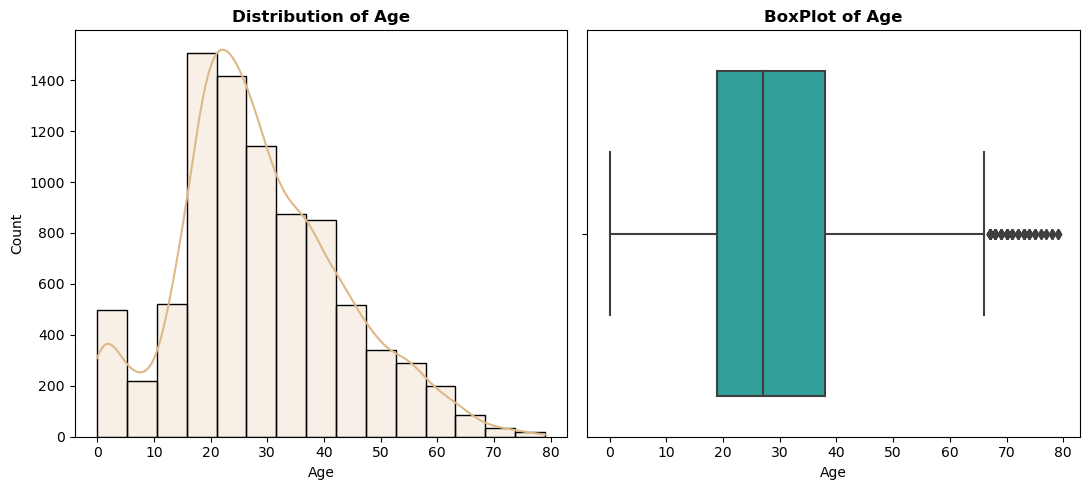

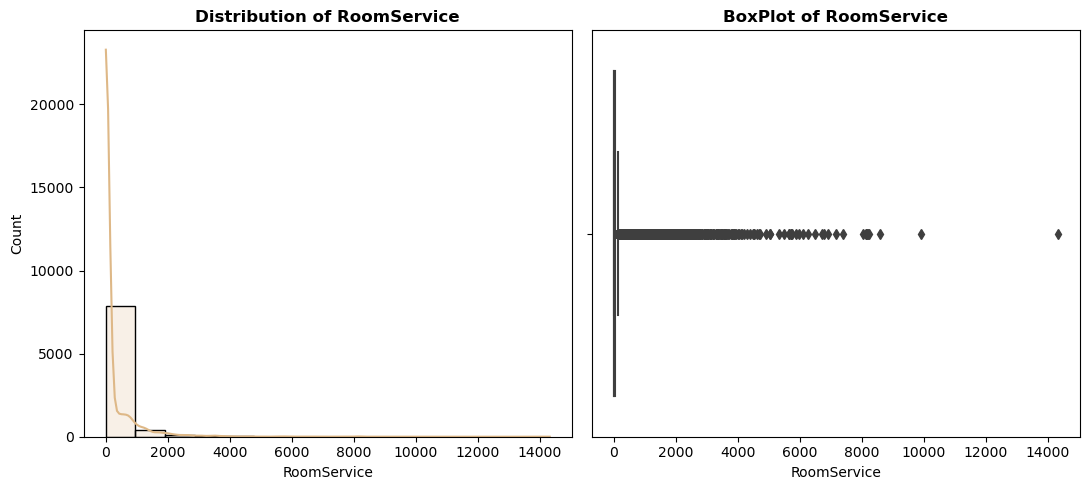

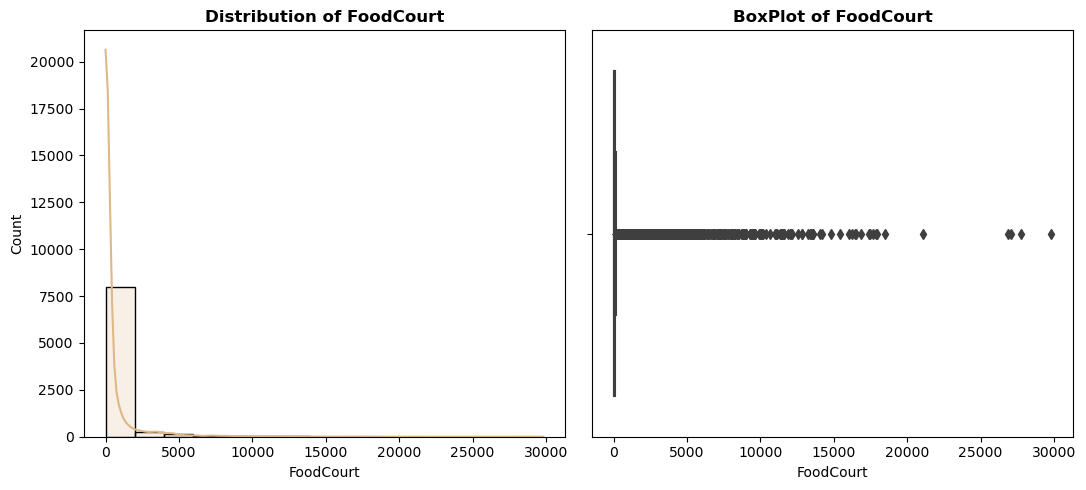

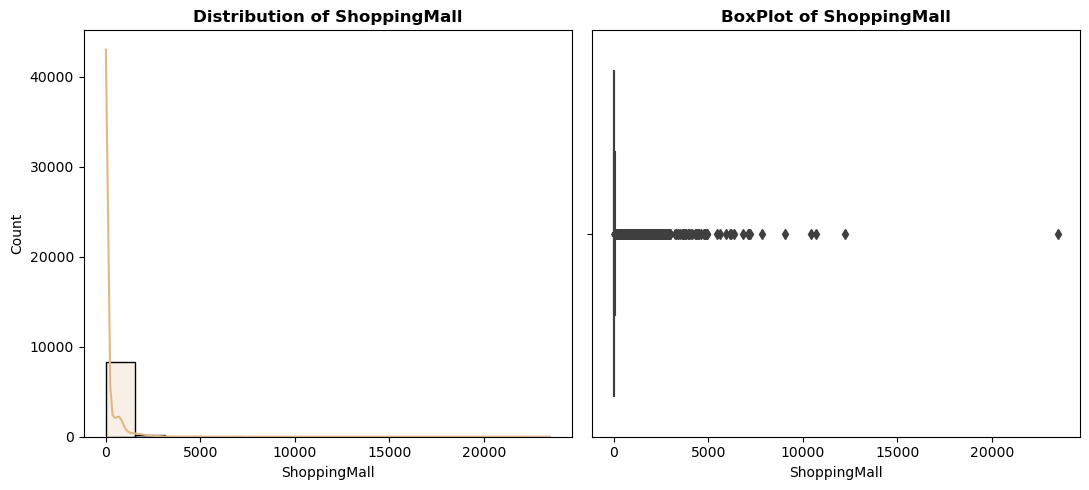

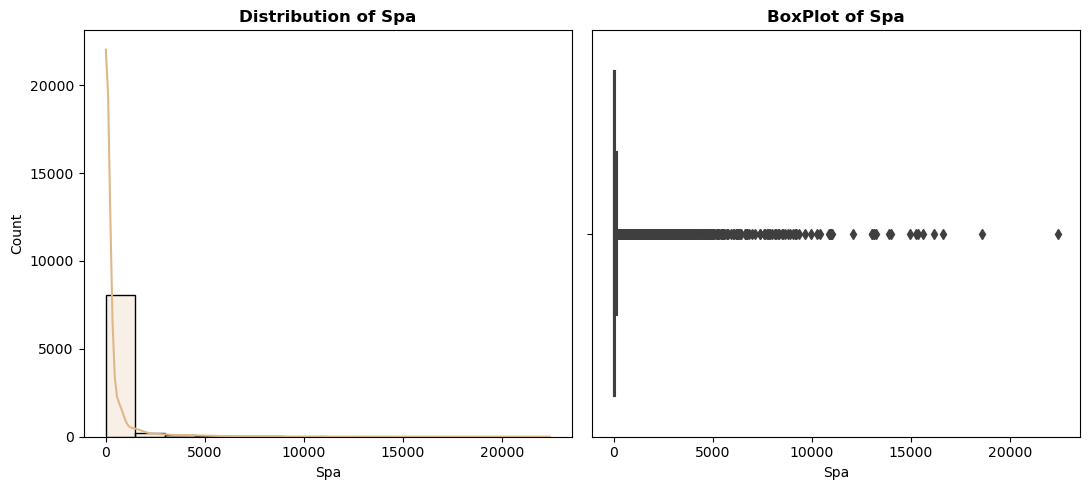

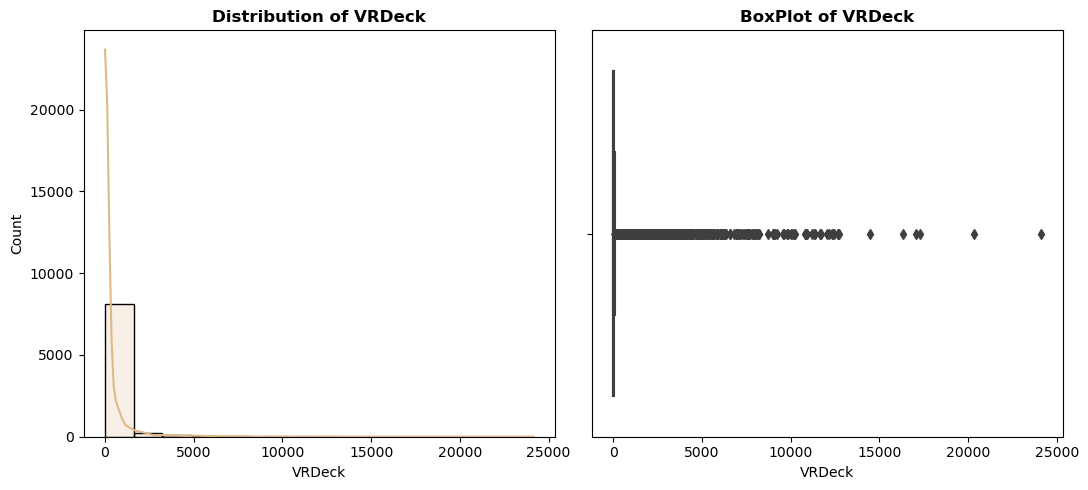

In [16]:
for i in col2:
    fig,axes=plt.subplots(1,2,figsize=(11,5))
    sns.histplot(ax=axes[0],data=sp_train,x=i,bins=15,kde=True,color='BurlyWood',alpha=0.2)
    axes[0].set_xlabel(f'{i}')
    axes[0].set_title(f'Distribution of {i}',fontweight='bold')

    sns.boxplot(ax=axes[1],data=sp_train,x=i,color='LightSeaGreen')
    axes[1].set_xlabel(f'{i}')
    axes[1].set_title(f'BoxPlot of {i}',fontweight='bold')
    plt.tight_layout()
    plt.show();
    print('\n')

### Insight : 
- We have some outliers, but most passengers are around 20 to 40 years old. 
- We have a lot of outliers in room service
- We have a lot of outliers in foodcourt
- Shoppinmall looks like all the distributions from values spent onboard


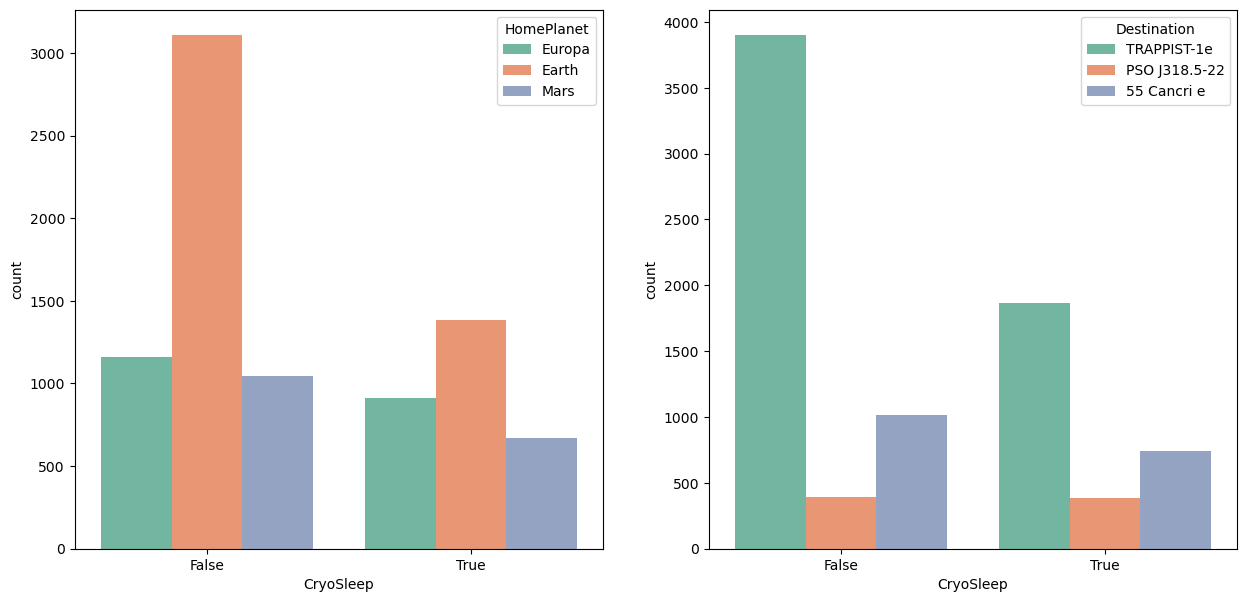

In [17]:
fig, axes=plt.subplots(1,2,figsize=(15,7))
sns.countplot(ax=axes[0],data=sp_train,x='CryoSleep',hue='HomePlanet',palette='Set2')
sns.countplot(ax=axes[1],data=sp_train,x='CryoSleep',hue='Destination',palette='Set2')
plt.show();

- Cryosleep has no pattern wrt either HomePlanet or EndDestination (so use Mode for impute cryosleep)

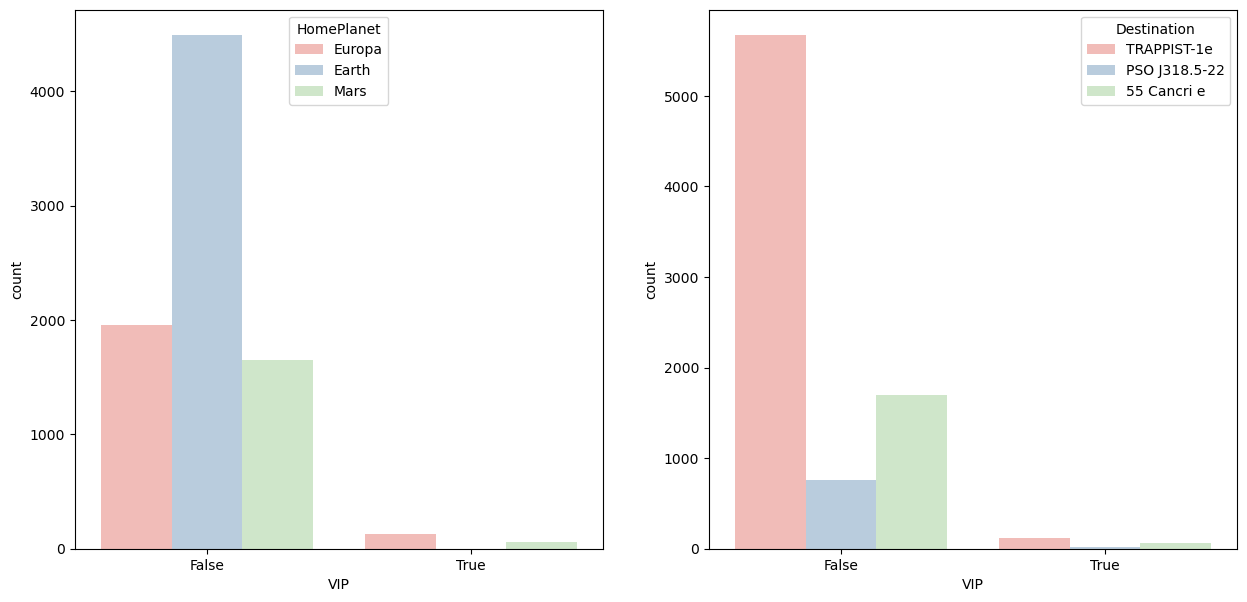

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.countplot(ax=axes[0],data=sp_train,x='VIP',hue='HomePlanet',palette='Pastel1')
sns.countplot(ax=axes[1],data=sp_train,x='VIP',hue='Destination',palette='Pastel1')
plt.show();

- Earth has no VIPs, So if VIP is missing, if HomePlanet is Earth VIP=FALSE (most are non VIP so VIp= False only)
- If VIP is True HomePlanet missing most Vip from Europa so we can fill Europa

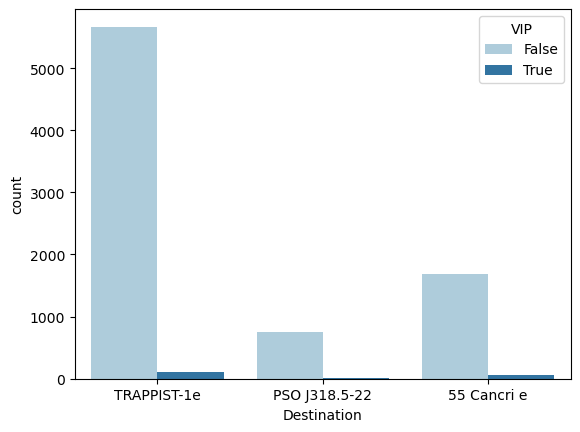

In [19]:
sns.countplot(data=sp_train,x='Destination',hue='VIP',palette='Paired')
plt.show();

- Most passengers going to Trappist-1e (No pattern for VIP)

# 3. Preprocessing The Data

- Merging both train and test for missing values operation

In [20]:
train_len=len(sp_train)
df=pd.concat([sp_train,sp_test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [22]:
age_median=df['Age'].median()

In [23]:
df['Age'].fillna(age_median,inplace=True)

In [24]:
print(df['HomePlanet'].mode())
print(df['CryoSleep'].mode())
print(df['Destination'].mode())
print(df['VIP'].mode())

0    Earth
Name: HomePlanet, dtype: object
0    False
Name: CryoSleep, dtype: object
0    TRAPPIST-1e
Name: Destination, dtype: object
0    False
Name: VIP, dtype: object


In [25]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0],inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0],inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0],inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)

# 4. Feature Engineering

## Exploring Cabin

In [26]:
cabin1=sp_train['Cabin'].str.split('/')
cabin1.head(20)

0     [B, 0, P]
1     [F, 0, S]
2     [A, 0, S]
3     [A, 0, S]
4     [F, 1, S]
5     [F, 0, P]
6     [F, 2, S]
7     [G, 0, S]
8     [F, 3, S]
9     [B, 1, P]
10    [B, 1, P]
11    [B, 1, P]
12    [F, 1, P]
13    [G, 1, S]
14    [F, 2, P]
15          NaN
16    [F, 3, P]
17    [F, 4, P]
18    [F, 5, P]
19    [G, 0, P]
Name: Cabin, dtype: object

In [27]:
C_deck=[]
C_num=[]
C_side=[]
for i in cabin1:
    try:
        C_deck.append(i[0])
        C_num.append(i[1])
        C_side.append(i[2])
    except:                            # for nan in 15.
        C_deck.append('NULL')
        C_num.append('-1')      # -1 as indicator of nan value
        C_side.append('NULL')

In [28]:
print(set(C_deck))
print('max decknum:{}'.format(max(C_num)),'minimum:{}'.format(0),sep='\n')
print(set(C_side))

{'G', 'T', 'B', 'NULL', 'D', 'C', 'E', 'F', 'A'}
max decknum:999
minimum:0
{'NULL', 'S', 'P'}


- P=Port --> Leftside
- S=Starboard --> Rightside

In [29]:
Cabin2=pd.DataFrame({"Cabin_deck":C_deck,"Cabin_decknum":C_num,"Cabin_side":C_side})
Cabin2.head()

,Cabin_deck,Cabin_decknum,Cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


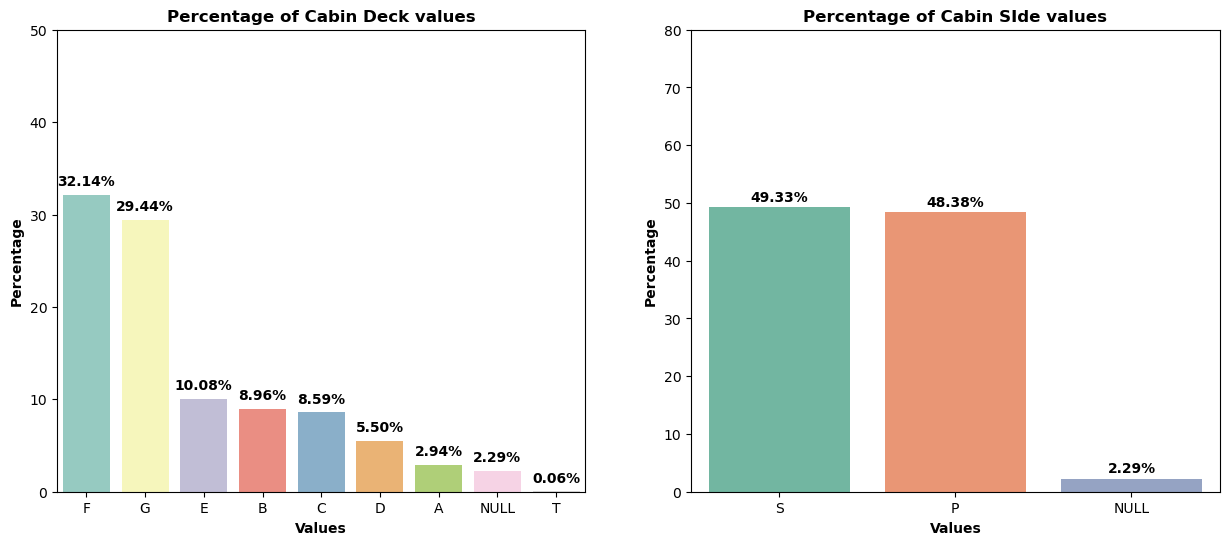

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
c1=(Cabin2['Cabin_deck'].value_counts(normalize=True)*100)
sns.barplot(ax=ax1,x=c1.index,y=c1.values,palette='Set3')

for index, value in enumerate(c1.index):
    ax1.text(index,c1[index]+1, f"{c1[index]:.2f}%",color='black',ha='center',fontweight='bold')
    ax1.set_title("Percentage of Cabin Deck values", fontweight = 'bold')
    ax1.set_xlabel("Values", fontweight = 'bold')
    ax1.set_ylabel("Percentage", fontweight = 'bold')

    ax1.set_ylim(0, 50)
    
c2=(Cabin2['Cabin_side'].value_counts(normalize=True)*100)    
sns.barplot(ax=ax2,x=c2.index,y=c2.values,palette='Set2')
for index, value in enumerate(c2.index):
    ax2.text(index, c2[index]+1, f"{c2[index]:.2f}%",color = 'black', ha = 'center', fontweight = 'bold')
    ax2.set_title("Percentage of Cabin SIde values", fontweight = 'bold')
    ax2.set_xlabel("Values", fontweight = 'bold')
    ax2.set_ylabel("Percentage", fontweight = 'bold')

    ax2.set_ylim(0, 80)
    
plt.show();    

- Most of passengers were in the Decks F and G

- The percentage of passengers on both sides were almost same

- Find mean median mode and impute the nan

F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
NULL     199
T          5
Name: Cabin_deck, dtype: int64

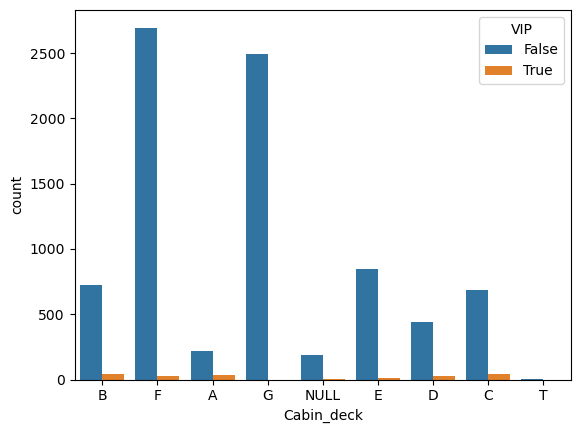

In [31]:
sns.countplot(x=Cabin2['Cabin_deck'],hue=sp_train['VIP'])
Cabin2['Cabin_deck'].value_counts()

- VIPs are distributed in every Cabin ie- no special cabins for VIPs but in the same Cabins probably some deluxe rooms,
- T can be merged with F or G

In [32]:
Cabin2.loc('Cabin_deck'=='T')
print(Cabin2['Cabin_deck'].mode())
print(Cabin2['Cabin_side'].mode())

0    F
Name: Cabin_deck, dtype: object
0    S
Name: Cabin_side, dtype: object


In [33]:
def impute_deck(cols):
    Cabin_deck=cols
    if Cabin_deck=='NULL':
        return 'F'
    else:
        return Cabin_deck

In [34]:
Cabin2['Cabin_deck']=Cabin2['Cabin_deck'].apply(impute_deck)

In [35]:
def impute_side(cols):
    Cabin_side=cols
    if Cabin_side=='NULL':
        return 'S'
    else:
        return Cabin_side

In [36]:
Cabin2['Cabin_side']=Cabin2['Cabin_side'].apply(impute_side)   

In [37]:
Cabin2.head(20)

,Cabin_deck,Cabin_decknum,Cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
5,F,0,P
6,F,2,S
7,G,0,S
8,F,3,S
9,B,1,P


sns.histplot(x=Cabin2['Cabin_decknum'],kde=True,bins=300)

- we can drop the decknum it maynot use...

In [38]:
Cabin2=Cabin2.drop(columns='Cabin_decknum',axis=1)

### Binning the age

In [39]:
def age(col):
    Age=col
    if Age<=10:
        return 'Infant'
    if Age>10 and Age<=20:
        return 'Teen'
    if Age>21 and Age<=50:
        return 'Adult'
    else:
        return 'elder'

In [40]:
df['Age']=df['Age'].apply(age)

In [41]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,Adult,False,0.0,0.0,0.0,0.0,0.000000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,Adult,False,109.0,9.0,25.0,549.0,44.000000,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,elder,True,43.0,3576.0,0.0,6715.0,49.000000,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,Adult,False,0.0,1283.0,371.0,3329.0,193.000000,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,Teen,False,303.0,70.0,151.0,565.0,2.000000,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,Adult,False,0.0,483.0,0.0,291.0,0.000000,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,Adult,False,42.0,1539.0,3.0,0.0,0.000000,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,Adult,False,0.0,0.0,0.0,0.0,306.789482,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,Adult,False,0.0,785.0,17.0,216.0,0.000000,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,Teen,False,0.0,0.0,0.0,0.0,0.000000,Erraiam Flatic,True


### Drop Name,Cabin & PassengerId 

In [42]:
df=df.drop(['PassengerId','Name','Cabin'],axis=1)

### Concatenating Cabin2

In [43]:
df=pd.concat([df,Cabin2],axis=1)

In [44]:
df["CryoSleep"]=df["CryoSleep"].astype('object')
df["VIP"]=df["VIP"].astype('object')

# 5. Encoding

In [45]:
oe=OrdinalEncoder()

In [46]:
object_cols=df.select_dtypes('object').columns
object_cols

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported',
       'Cabin_deck', 'Cabin_side'],
      dtype='object')

In [47]:
df[object_cols]=oe.fit_transform(df[object_cols])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  float64
 1   CryoSleep     12970 non-null  float64
 2   Destination   12970 non-null  float64
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  float64
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   float64
 11  Cabin_deck    8693 non-null   float64
 12  Cabin_side    8693 non-null   float64
dtypes: float64(13)
memory usage: 1.4 MB


# 6. Checking & Handeling Skew

In [49]:
skewcols=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_side']

HomePlanet
0.6989306280653652


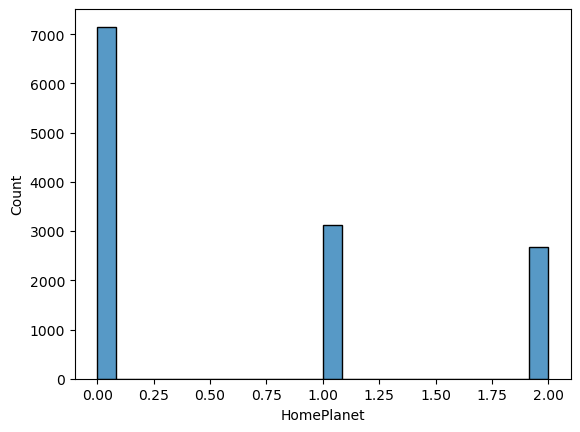

CryoSleep
0.6142733819484069


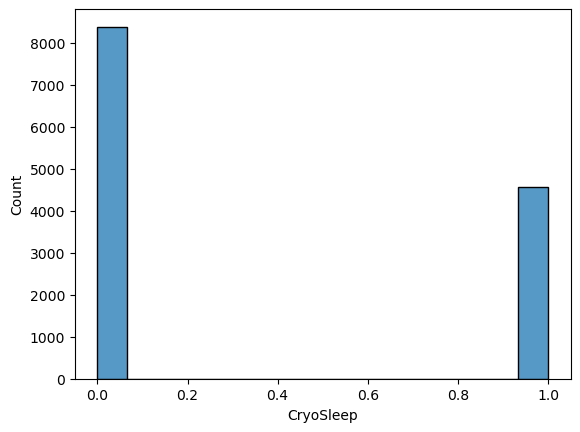

Destination
-1.1511922349231982


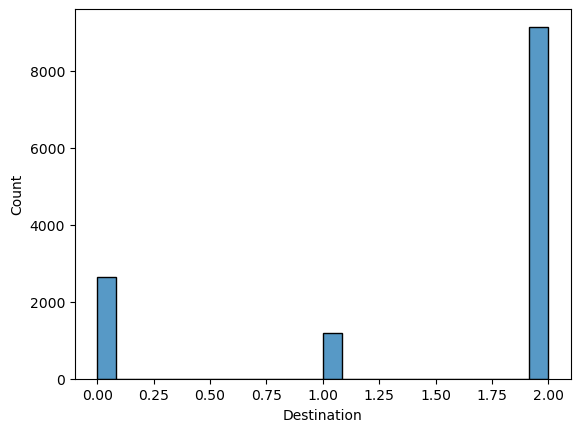

Age
0.8274468558196876


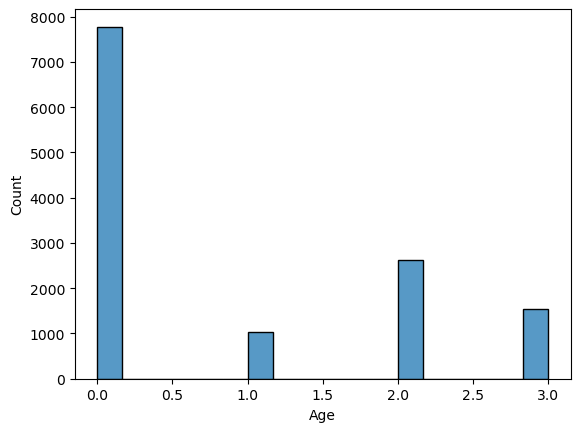

VIP
6.673129599457782


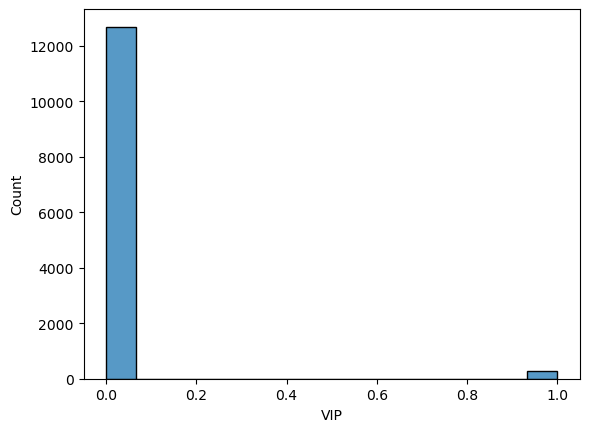

RoomService
6.20265871983705


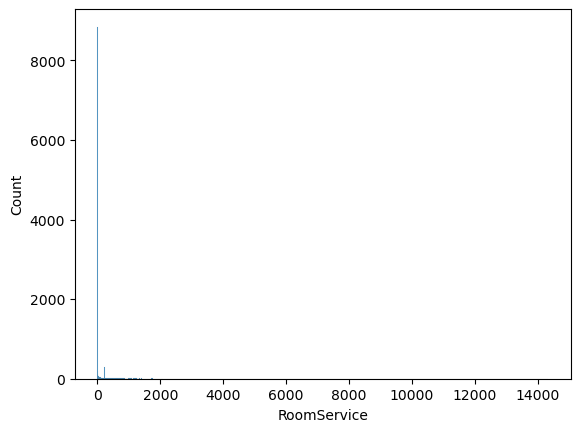

FoodCourt
7.131031845368232


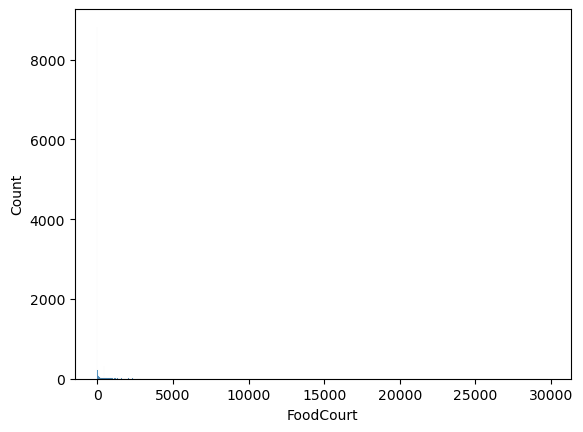

ShoppingMall
11.139982843221103


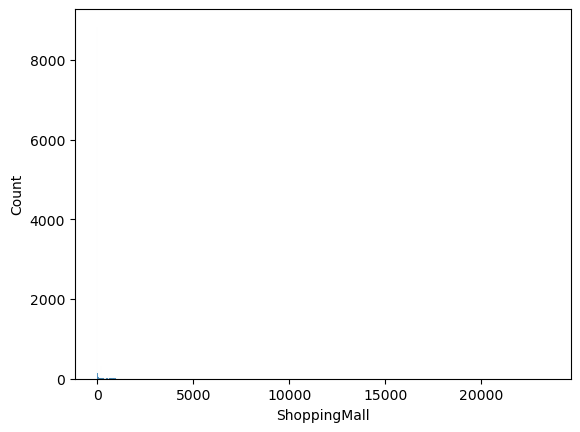

Spa
7.737444852703581


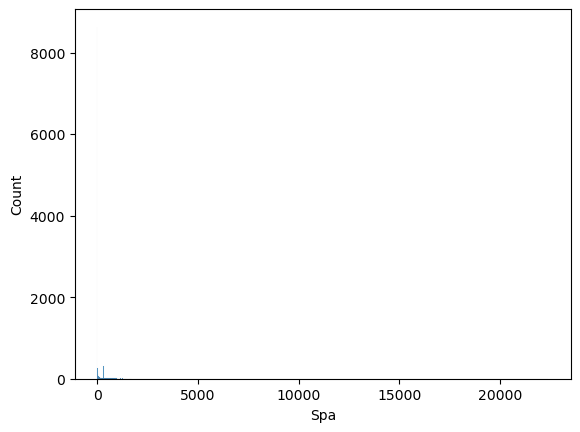

VRDeck
8.143414595685682


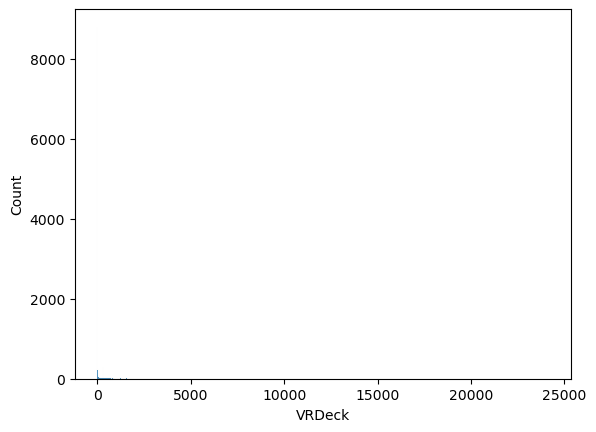

Cabin_deck
nan


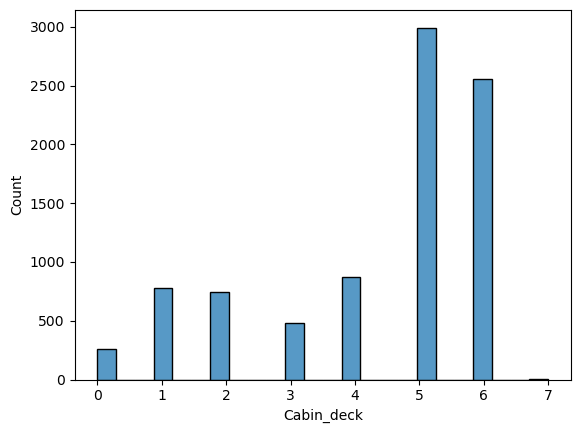

Cabin_side
nan


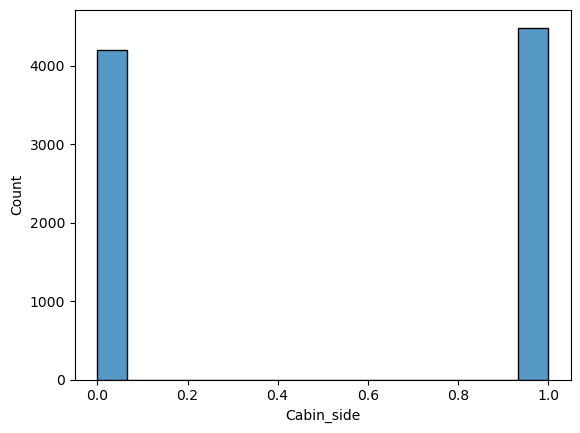

In [50]:
for i in skewcols:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.histplot(df[i])
    plt.show();

0.36139759977672636
AxesSubplot(0.125,0.11;0.775x0.77)


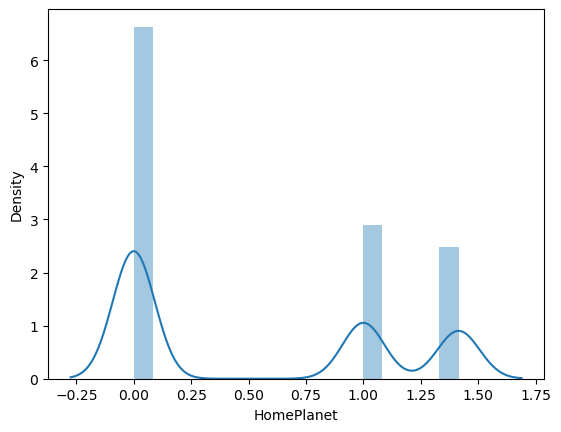

In [51]:
df["HomePlanet"]=np.sqrt(df["HomePlanet"])
print(skew(df["HomePlanet"]))
print(sns.distplot(df["HomePlanet"]))
plt.show();

0.547533878948446
AxesSubplot(0.125,0.11;0.775x0.77)


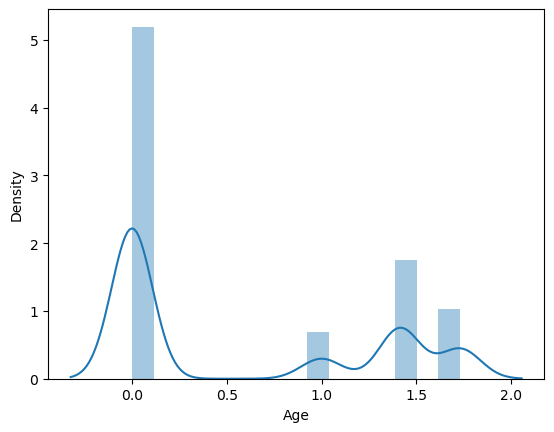

In [52]:
df["Age"]=np.sqrt(df["Age"])
print(skew(df["Age"]))
print(sns.distplot(df["Age"]))
plt.show();

2.2526532567908117
AxesSubplot(0.125,0.11;0.775x0.77)


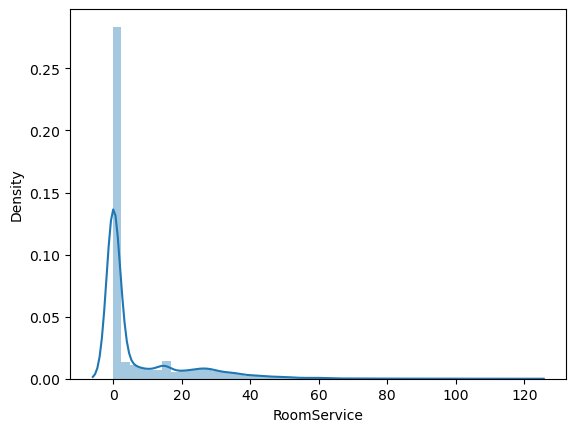

In [53]:
df["RoomService"]=np.sqrt(df["RoomService"])
print(skew(df["RoomService"]))
print(sns.distplot(df["RoomService"]))
plt.show();

2.851497292515541
AxesSubplot(0.125,0.11;0.775x0.77)


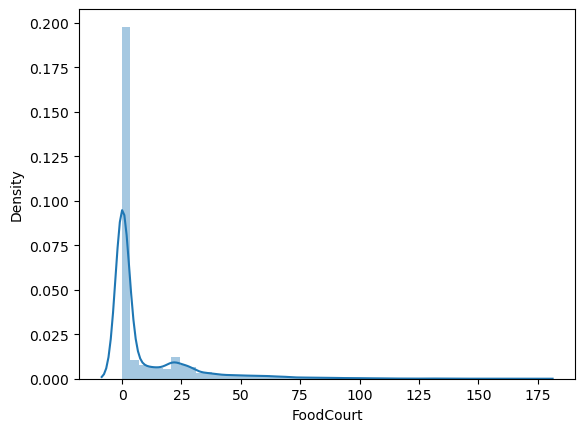

In [54]:
df["FoodCourt"]=np.sqrt(df["FoodCourt"])
print(skew(df["FoodCourt"]))
print(sns.distplot(df["FoodCourt"]))
plt.show();

2.601540024394093
AxesSubplot(0.125,0.11;0.775x0.77)


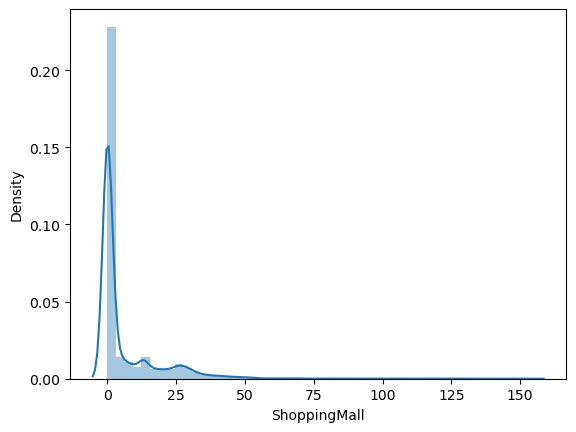

In [55]:
df["ShoppingMall"]=np.sqrt(df["ShoppingMall"])
print(skew(df["ShoppingMall"]))
print(sns.distplot(df["ShoppingMall"]))
plt.show();

2.98762491255
AxesSubplot(0.125,0.11;0.775x0.77)


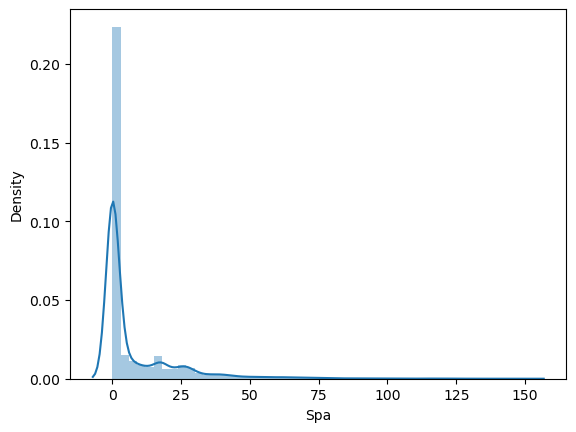

In [56]:
df["Spa"]=np.sqrt(df["Spa"])
print(skew(df["Spa"]))
print(sns.distplot(df["Spa"]))
plt.show();

3.1518947827562673
AxesSubplot(0.125,0.11;0.775x0.77)


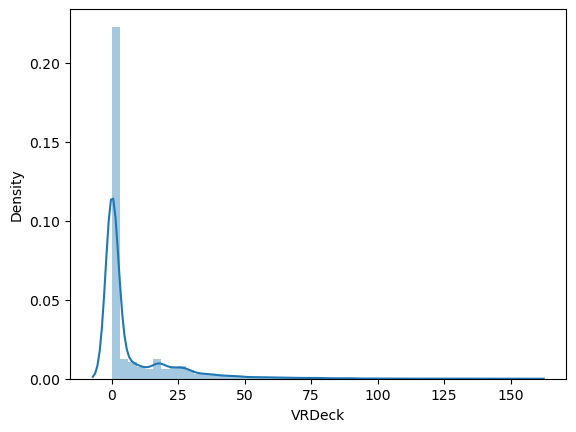

In [57]:
df["VRDeck"]=np.sqrt(df["VRDeck"])
print(skew(df["VRDeck"]))
print(sns.distplot(df["VRDeck"]))
plt.show();

nan
AxesSubplot(0.125,0.11;0.775x0.77)


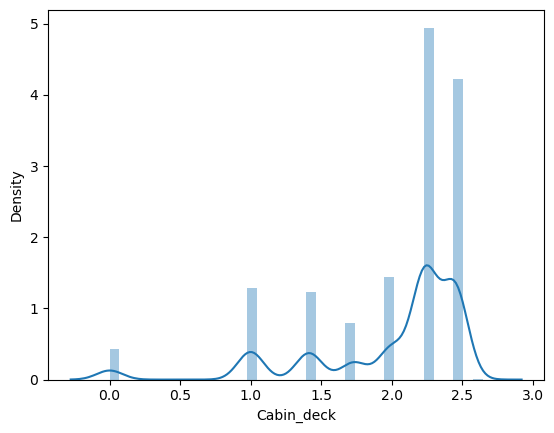

In [58]:
df["Cabin_deck"]=np.sqrt(df["Cabin_deck"])
print(skew(df["Cabin_deck"]))
print(sns.distplot(df["Cabin_deck"]))
plt.show();

# 7. Model Training

- Seperating Train and Test

In [59]:
sp_train=df.iloc[:train_len:]
sp_test=df.iloc[train_len:,:]

### Spliting X and Y 

-  X = -> _Features_
-  Y = -> _Target_

In [60]:
x=sp_train.drop(['Transported'],axis=1)
print(x.head())
y=sp_train['Transported']
print(y.head())

   HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  FoodCourt  \
0         1.0        0.0          2.0  0.000000  0.0     0.000000   0.000000   
1         0.0        0.0          2.0  0.000000  0.0    10.440307   3.000000   
2         1.0        0.0          2.0  1.732051  1.0     6.557439  59.799666   
3         1.0        0.0          2.0  0.000000  0.0     0.000000  35.818989   
4         0.0        0.0          2.0  1.414214  0.0    17.406895   8.366600   

   ShoppingMall        Spa     VRDeck  Cabin_deck  Cabin_side  
0      0.000000   0.000000   0.000000    1.000000         0.0  
1      5.000000  23.430749   6.633250    2.236068         1.0  
2      0.000000  81.945104   7.000000    0.000000         1.0  
3     19.261360  57.697487  13.892444    0.000000         1.0  
4     12.288206  23.769729   1.414214    2.236068         1.0  
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Transported, dtype: float64


In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=8)

In [62]:
def model(mymodel):
    mymodel.fit(xtrain,ytrain)
    ypred=mymodel.predict(xtest)
    
    train=mymodel.score(xtrain,ytrain)
    test=mymodel.score(xtest,ytest)
    
    print(f'testing accuracy:{test}\n\n')
    print(classification_report(ytest,ypred))
    return mymodel

#### Logistic Regression

In [63]:
lr=model(LogisticRegression(max_iter=60))

testing accuracy:0.8013803680981595


              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1273
         1.0       0.80      0.82      0.81      1335

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



#### Random Forest Classifier

In [64]:
rf=model(RandomForestClassifier())

testing accuracy:0.8029141104294478


              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80      1273
         1.0       0.83      0.78      0.80      1335

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



#### xgboost (XGB Classifier)

In [65]:
xgb=model(XGBClassifier())

testing accuracy:0.8021472392638037


              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1273
         1.0       0.82      0.78      0.80      1335

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



#### Tensorflow (ANN)

In [66]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [67]:
ann=Sequential()
ann.add(Dense(units=100))
ann.add(Dense(units=500))
ann.add(Dense(units=300,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(xtrain,ytrain,batch_size=30,epochs=140,validation_data=(xtest,ytest),callbacks=es)
ypred=ann.predict(xtest)

Epoch 1/140
203/203 [==============================] - 14s 17ms/step - loss: 0.6816 - accuracy: 0.7533 - val_loss: 0.4701 - val_accuracy: 0.7883
Epoch 2/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4870 - accuracy: 0.7699 - val_loss: 0.4466 - val_accuracy: 0.7983
Epoch 3/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4755 - accuracy: 0.7706 - val_loss: 0.4372 - val_accuracy: 0.7991
Epoch 4/140
203/203 [==============================] - 2s 7ms/step - loss: 0.4620 - accuracy: 0.7865 - val_loss: 0.4472 - val_accuracy: 0.7887
Epoch 5/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4616 - accuracy: 0.7836 - val_loss: 0.4384 - val_accuracy: 0.8048
Epoch 6/140
203/203 [==============================] - 2s 7ms/step - loss: 0.4560 - accuracy: 0.7867 - val_loss: 0.4419 - val_accuracy: 0.7945
Epoch 7/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4554 - accuracy: 0.7855 - val_loss: 0.4336 - val_accuracy: 0.79

Epoch 58/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4286 - accuracy: 0.7951 - val_loss: 0.4416 - val_accuracy: 0.8025
Epoch 59/140
203/203 [==============================] - 2s 7ms/step - loss: 0.4321 - accuracy: 0.7919 - val_loss: 0.4217 - val_accuracy: 0.8025
Epoch 60/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4296 - accuracy: 0.7910 - val_loss: 0.4220 - val_accuracy: 0.8056
Epoch 61/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4294 - accuracy: 0.7988 - val_loss: 0.4324 - val_accuracy: 0.7975
Epoch 62/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4257 - accuracy: 0.7962 - val_loss: 0.4329 - val_accuracy: 0.7945
Epoch 63/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4286 - accuracy: 0.7944 - val_loss: 0.4217 - val_accuracy: 0.8060
Epoch 64/140
203/203 [==============================] - 2s 8ms/step - loss: 0.4291 - accuracy: 0.7939 - val_loss: 0.4300 - val_accuracy:

Epoch 115/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4119 - accuracy: 0.7987 - val_loss: 0.4300 - val_accuracy: 0.7918
Epoch 116/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4180 - accuracy: 0.7965 - val_loss: 0.4386 - val_accuracy: 0.8041
Epoch 117/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4176 - accuracy: 0.8003 - val_loss: 0.4402 - val_accuracy: 0.8029
Epoch 118/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4137 - accuracy: 0.7998 - val_loss: 0.4326 - val_accuracy: 0.7941
Epoch 119/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4095 - accuracy: 0.7987 - val_loss: 0.4292 - val_accuracy: 0.8010
Epoch 120/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4188 - accuracy: 0.7987 - val_loss: 0.4355 - val_accuracy: 0.7933
Epoch 121/140
203/203 [==============================] - 1s 7ms/step - loss: 0.4154 - accuracy: 0.8018 - val_loss: 0.4314 - val_ac

In [68]:
ann.evaluate(xtrain,ytrain)

191/191 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8046


[0.3996884822845459, 0.8046014904975891]

In [69]:
ann.evaluate(xtest,ytest)

82/82 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7972


[0.43151533603668213, 0.7971625924110413]

In [70]:
ypred=ypred>0.5

In [71]:
train=ann.evaluate(xtrain,ytrain)
test=ann.evaluate(xtest,ytest)

print(f'\ntrain: {train}\n test: {test}\n')
print(classification_report(ytest,ypred))

82/82 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.7972

train: [0.3996884822845459, 0.8046014904975891]
 test: [0.43151533603668213, 0.7971625924110413]

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80      1273
         1.0       0.84      0.74      0.79      1335

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



- Model Training with Complete Data

In [72]:
model=XGBClassifier()
model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# input split for test data we dont need y as thats what we need to predict

X_test=sp_test.drop(['Transported'],axis=1)

In [74]:
pred=model.predict(X_test)
pred

array([1, 0, 1, ..., 1, 1, 1])

- convert values to Boolean type for submission.csv

In [75]:
transported=[]
for i in pred:
    if i==1:
        transported.append(True)
    if i==0:
        transported.append(False)
transported[0:10]

[True, False, True, True, True, False, True, True, True, True]

In [76]:
transported=list(transported)

In [77]:
PassengerId=pd.read_csv('test.csv',usecols=['PassengerId'])
print(PassengerId[0:10])

  PassengerId
0     0013_01
1     0018_01
2     0019_01
3     0021_01
4     0023_01
5     0027_01
6     0029_01
7     0032_01
8     0032_02
9     0033_01


In [78]:
print(type(PassengerId))
PassengerId=PassengerId['PassengerId'].tolist()

<class 'pandas.core.frame.DataFrame'>


In [79]:
KSubmission=pd.DataFrame({'PassengerId':PassengerId,'Transported':transported})

In [80]:
KSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


- Submission csv file Generate

In [81]:
KSubmission.to_csv('submission.csv',index=False)